# What is Mutual Information

The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for classification problems.

Mutual information (MI) is a measure of the amount of information between two random variables 
is symmetric and non-negative, and it could be zero if and only if the variables are independent.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
data = pd.read_csv('./Data-Files-for-Feature-Selection-master/santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']
X.shape, y.shape

((20000, 370), (20000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


In [ ]:
#Remove constant, quasi constant, and duplicate features

In [6]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [7]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [8]:
X_train_T.duplicated().sum()

18

In [9]:
duplicated_features = X_train_T.duplicated()

In [10]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

# Calculate the MI For Classification

In [ ]:
mutual_info_classif( )

Mutual information measures the dependency between the variables.
It is equal to zero if and only if two random variables are
independent, and higher values mean higher dependency

In [13]:
mi = mutual_info_classif(X_train_unique, y_train) 
len(mi)

227

In [14]:
mi[: 10]

array([0.00274484, 0.        , 0.01222935, 0.00138967, 0.00033554,
       0.00074467, 0.00035584, 0.        , 0.00061   , 0.        ])

In [15]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [16]:
mi.sort_values(ascending=False, inplace = True)

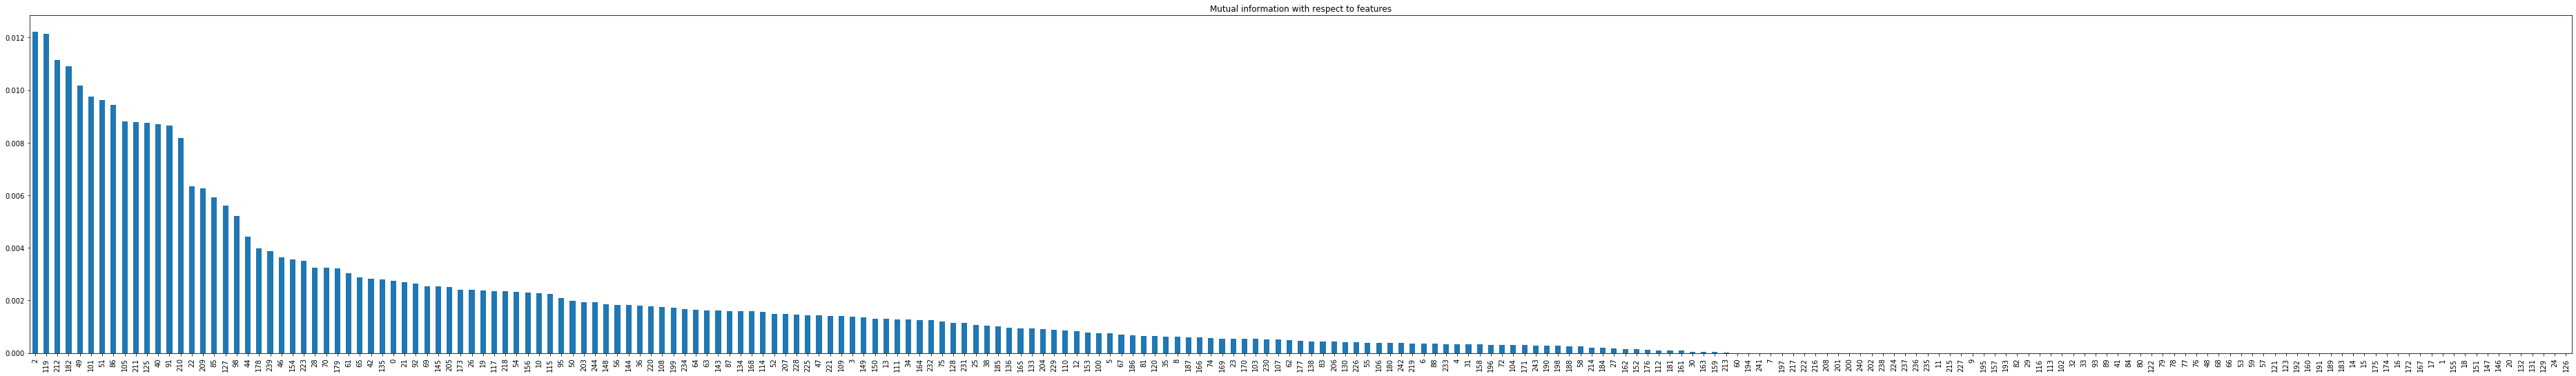

In [25]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (66, 9))
plt.show()

In [ ]:
#Let’s go ahead and work with percentile. We will select 10 percentile of the features. Let’s have a look at following code

In [18]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  1,   2,  22,  40,  49,  50,  51,  61,  85,  86,  91, 100, 101,
            105, 119, 125, 127, 182, 187, 209, 210, 211, 212],
           dtype='int64')

In [19]:
len(X_train_unique.columns[sel.get_support()])

23

In [20]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)
X_train_mi.shape

(16000, 23)

## Build the model and compare the performance

In [21]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [22]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 2.37 s, sys: 108 ms, total: 2.48 s
Wall time: 1.58 s


In [23]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 5.95 s, sys: 195 ms, total: 6.14 s
Wall time: 3.62 s


# Mutual Information Gain in Regression

In [26]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
y = boston.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)
mi

LSTAT      0.676953
RM         0.559396
INDUS      0.511955
PTRATIO    0.475664
NOX        0.447351
TAX        0.385949
CRIM       0.358619
AGE        0.346476
DIS        0.323300
RAD        0.213126
ZN         0.202982
B          0.155529
CHAS       0.006504
dtype: float64

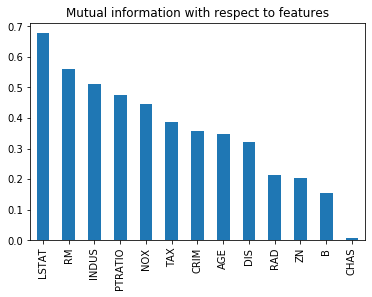

In [32]:
plt.title('Mutual information with respect to features')
mi.plot.bar()
plt.show()

In [33]:
sel = SelectKBest(mutual_info_regression, k = 9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.5892223849182512

In [35]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085133

In [36]:
np.std(y)

9.188011545278203

In [37]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [38]:
X_test_9 = sel.transform(X_test)
model = LinearRegression()
model.fit(X_train_9, y_train)
y_predict = model.predict(X_test_9)
print('r2_score')
r2_score(y_test, y_predict)
r2_score

r2_score


<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [39]:
print('rmse')
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


6.175103151293748